In [59]:
#Installing SQLite & other necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Loading the dataset
pokemonstat_df = pd.read_csv('/content/PokemonStats.csv')

In [61]:
#Printing first 5 rows of datatset
pokemonstat_df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [62]:
#Statistics of Pokemon data

pokemonstat_df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [63]:
#Creating an in-memory SQLite database and connecting to it
con = sqlite3.connect(':memory:')
cur = con.cursor()

#Loading the PokemonStat dataframe into the SQLite database as a table named "PokemonStats"
pokemonstat_df.to_sql('PokemonStats', con, index=False, if_exists='replace')

#To check if data was loaded correctly
cur.execute("SELECT * FROM PokemonStats LIMIT 2;")
print(cur.fetchall())

[(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, 0, 'Green', 1, 0.875, 'Monster', 'Grass', 0, 0.71, 6.9, 45, 'quadruped'), (2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 1, 0, 'Green', 1, 0.875, 'Monster', 'Grass', 0, 0.99, 13.0, 45, 'quadruped')]


In [64]:
#Checking if any columns have missing values

nullvalues = """
SELECT
    SUM(CASE WHEN Name IS NULL THEN 1 ELSE 0 END) AS missing_name,
    SUM(CASE WHEN Type_1 IS NULL THEN 1 ELSE 0 END) AS missing_type_1,
    SUM(CASE WHEN Total IS NULL THEN 1 ELSE 0 END) AS missing_total,
    SUM(CASE WHEN HP IS NULL THEN 1 ELSE 0 END) AS missing_hp,
    SUM(CASE WHEN Attack IS NULL THEN 1 ELSE 0 END) AS missing_attack,
    SUM(CASE WHEN Defense IS NULL THEN 1 ELSE 0 END) AS missing_defense,
    SUM(CASE WHEN Sp_Atk IS NULL THEN 1 ELSE 0 END) AS missing_sp_atk,
    SUM(CASE WHEN Sp_Def IS NULL THEN 1 ELSE 0 END) AS missing_sp_def,
    SUM(CASE WHEN Speed IS NULL THEN 1 ELSE 0 END) AS missing_speed,
    SUM(CASE WHEN isLegendary IS NULL THEN 1 ELSE 0 END) AS missing_isLegendary
FROM
    PokemonStats;
"""

null_pokemon = pd.read_sql_query(nullvalues, con) #Execute the SQL query
null_pokemon #Display result

,missing_name,missing_type_1,missing_total,missing_hp,missing_attack,missing_defense,missing_sp_atk,missing_sp_def,missing_speed,missing_isLegendary
0,0,0,0,0,0,0,0,0,0,0


In [65]:
#Checking count of pokemon in terms of primary type (Type_1)

typecount = """
SELECT Type_1, COUNT(*) AS count
FROM PokemonStats
GROUP BY Type_1
ORDER BY count DESC;
"""

typecount_pokemon = pd.read_sql_query(typecount, con) #Execute the SQL query
typecount_pokemon #Display result

,Type_1,count
0,Water,105
1,Normal,93
2,Grass,66
3,Bug,63
4,Psychic,47
5,Fire,47
6,Rock,41
7,Electric,36
8,Ground,30
9,Poison,28


**QUESTION 1**

The SQL Dialect: **PostgreSQL**.

In [66]:
#SQL query to find the top 3 Pokemon in terms of total stats of each primary type (Type_1).
#I have used Common Table Expression (CTE) to rank Pokemon within each type based on their total stats in descending order, then filtered to select only those with a rank of 3 or less.
#The result includes the Pokemon ID, name, type,total stats and rank, ordered by type and rank.

top3 = """
WITH RankedPokemon AS (
    SELECT *, ROW_NUMBER() OVER (PARTITION BY Type_1 ORDER BY Total DESC) AS Rank
    FROM PokemonStats
)
SELECT Name, Type_1, Total,Rank
FROM RankedPokemon
WHERE Rank <= 3
ORDER BY Type_1, Rank;
"""

#To execute the SQL query and retrieve the results
top3_pokemon = pd.read_sql_query(top3, con)

#Displaying the results
top3_pokemon

,Name,Type_1,Total,Rank
0,Genesect,Bug,600,1
1,Volcarona,Bug,550,2
2,Yanmega,Bug,515,3
3,Yveltal,Dark,680,1
4,Darkrai,Dark,600,2
5,Hydreigon,Dark,600,3
6,Rayquaza,Dragon,680,1
7,Reshiram,Dragon,680,2
8,Zekrom,Dragon,680,3
9,Zapdos,Electric,580,1


**QUESTION 2**

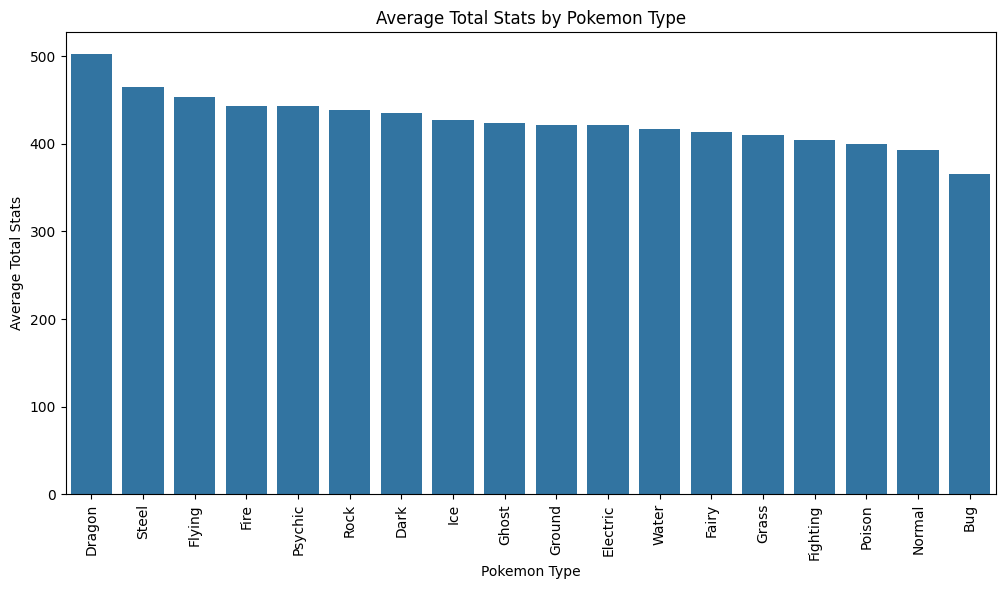

In [67]:
#To calculate average stats by grouping Type_1

type_stats = pokemonstat_df.groupby('Type_1')[['Total','Attack','Defense','Sp_Atk','Sp_Def']].mean().sort_values(by='Total', ascending=False)

#Plotting the average total stats by type

plt.figure(figsize=(12,6))
sns.barplot(x=type_stats.index, y=type_stats['Total'])
plt.xticks(rotation=90)
plt.title('Average Total Stats by Pokemon Type')
plt.ylabel('Average Total Stats')
plt.xlabel('Pokemon Type')
plt.show()

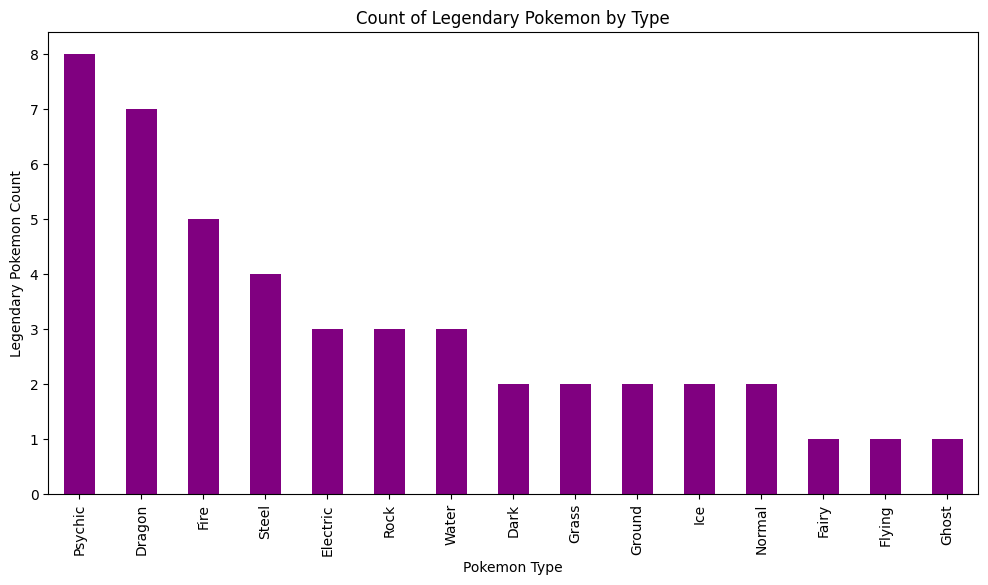

In [68]:
#Counting the number of Legendary Pokemon in terms of type

legendary_num = pokemonstat_df[pokemonstat_df['isLegendary'] == True].groupby('Type_1').size().sort_values(ascending=False)

#Plotting Legendary Pokemon count in terms of type

plt.figure(figsize=(12,6))
legendary_num.plot(kind='bar', color='purple')
plt.title('Count of Legendary Pokemon by Type')
plt.ylabel('Legendary Pokemon Count')
plt.xlabel('Pokemon Type')
plt.show()

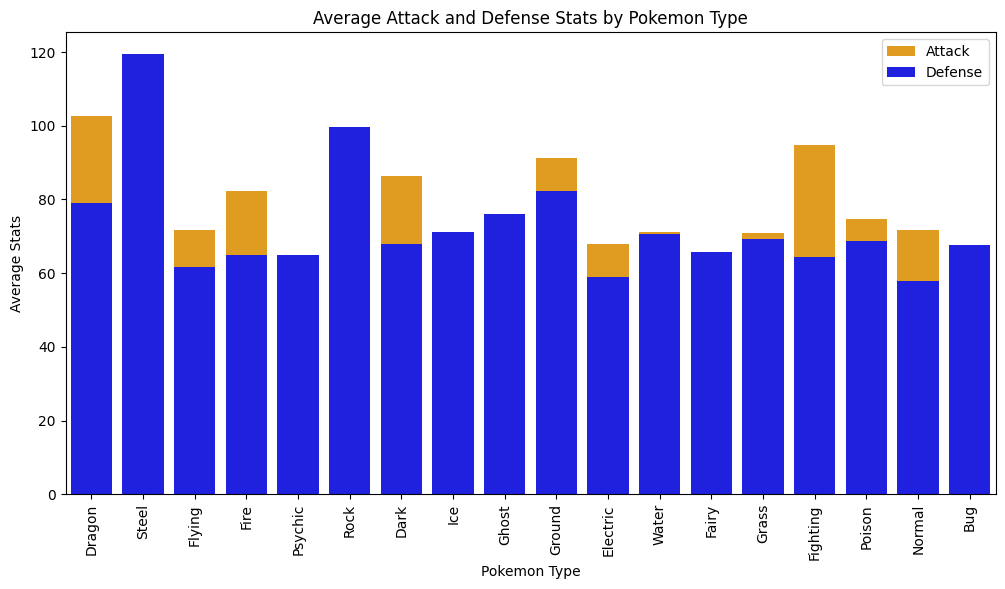

In [69]:
# Plotting average Attack and Defense stats by type

plt.figure(figsize=(12,6))
sns.barplot(x=type_stats.index, y=type_stats['Attack'], color='orange', label='Attack')
sns.barplot(x=type_stats.index, y=type_stats['Defense'], color='blue', label='Defense')
plt.xticks(rotation=90)
plt.title('Average Attack and Defense Stats by Pokemon Type')
plt.ylabel('Average Stats')
plt.xlabel('Pokemon Type')
plt.legend()
plt.show()

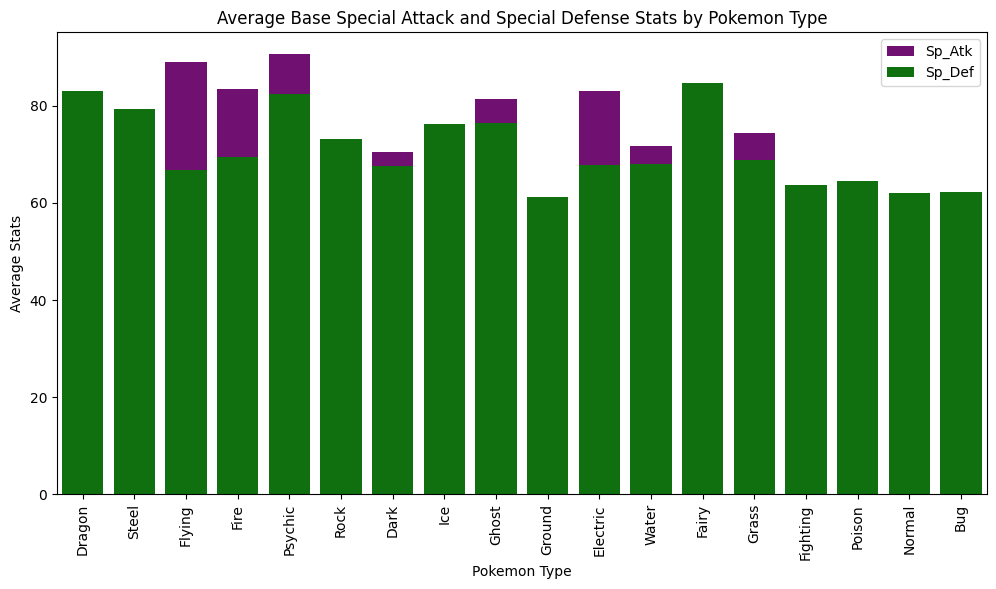

In [70]:
# Plotting average Attack and Defense stats by type

plt.figure(figsize=(12,6))
sns.barplot(x=type_stats.index, y=type_stats['Sp_Atk'], color='purple', label='Sp_Atk')
sns.barplot(x=type_stats.index, y=type_stats['Sp_Def'], color='green', label='Sp_Def')
plt.xticks(rotation=90)
plt.title('Average Base Special Attack and Special Defense Stats by Pokemon Type')
plt.ylabel('Average Stats')
plt.xlabel('Pokemon Type')
plt.legend()
plt.show()

In Pokemon battles and raids, **Pokemon's strength** comes from Attack, Special Attack, and Speed, and **Pokemon's defense** comes from Defense, Special Defense, and HP. Therefore, I analyzed these stats across all Pokemon types to see which type has the best overall combination of offensive and defensive abilities.

In considering which Pokemon type to select for optimal performance in battles and raids, I focused on the representation of **Legendary Pokemon** within each type as well. Calculating the count of Legendary Pokemon by type can provide additional insights into the strength by considering the assumption that Legendary Pokemons typically have higher base stats compared to non-Legendary Pokemons.

After gathering and analyzing the data based on the average stats per type with the help of graphs, I have got the following insights:

1. **Dragon-Type Pokemon** have the highest average of total stats. They have very high average Attack and Special Attack, making them good offensive battlers. They also have the second highest count of legendary pokemons.

2. **Steel-Type Pokemon** have the second highest average of total stats. They have highest value of Defense and Special Defense, making them good defenders.

3. **Psychic-Type & Fairy-Type Pokemon** have high Special Defense and are good for resisting special attacks. Psychic type pokemons have highest highest count of legendary pokemons.

4. **Fighting-Type Pokemon** have strong Attack, which helps in hitting enemies hard with their moves.

5. **Flying-Type Pokemon** have high Special Attack, so they can deal significant damage with its special moves.   

Based on the data analysis and visualizations, **Dragon-type Pokemon** are the best choice for maximizing battle and raid success. They have the highest total stats, higher legendary Pokemon count, and great offensive and defensive stats.

**QUESTION 3**

**Hypothesis:**

The implementation of a **"Daily Streak Milestone Rewards"** feature, which allows users to get exclusive benefits (such as digital currency - gems, more bonus rounds, triple points, outfits, badges streaks, and access to premium material) for sustaining longer daily streaks. This has the potential to enhance both user engagement and Duolingo's revenue.

Currently, Duolingo promotes streaks to some degree, but more prizes could further inspire users to interact everyday, boosting their likelihood of both returning to the app and converting to premium services (Duolingo Plus).

**Data Required for Analysis of this opportunity:**

To effectively analyze this opportunity, we need to gather and assess the following data:

1. **User Engagement Metrics:**
- Daily active users and monthly active users.
- Frequency of app usage (daily, weekly, monthly).
- Time spent per session and overall session length.

2. **Retention Rates:**
- Drop-off rates at various stages of the learning process.

3. **Monetization Data:**
- Payment rates from free to premium subscriptions.
- Average revenue per user.
- Impact of promotional offers on subscription rates.

4. **User Satisfaction Survey:**
- Surveys or reviews assessing user satisfaction with the current app experience.


**Tools and Techniques for Analysis :**

1. **Data Analysis and Visualization:**
- **Python:** Utilize Python libraries for data manipulation and visualization.
- **SQL:** To query user engagement data from the database.

2. **A/B Testing:**
- To evaluate the effectiveness of the new rewards system against the existing setup.

3. **Machine Learning:**
- To employ machine learning algorithms to predict user retention and identify patterns in user behavior that could help in the development of personalized rewards.

**Potential Business Recommendations :**

Based on the analysis of the gathered data, the business recommendations are:

1. **Implementing Tiered Reward System:**
- Creating multiple levels of reward system that users can unlock based on their usage frequency and learning milestones.

2. **Enhance User Experience(UI/UX):**
- Use insights from user feedback to refine gamification elements. For example, adding social features where users can share achievements on their social media platforms (LinkedIn, Facebook, Instagram).

3. **Promotional Campaigns:**
- Launch targeted marketing campaigns promoting the new rewards system to invite free users to upgrade to premium subscriptions.

4. **Regular Reviews of User Engagement:**
- Through collecting user feedback from surveys and
continuously monitoring the effectiveness of the new system and make adjustments based on it.